
## Mandat 1 (Probabilités)
### 1.Machine à sous
i) Afin de déterminer quelle machine à le plus de chance d'offrir un pouvoir au joueur entre la machine 1 (3 roues ayant chacune 8 pictogramemes) et la machine 2 (4 roues ayant chacunes 5 pictogrammes), il suffit d'utiliser les technique de dénombrements afin de déterminer les probabilité que chaque roue s'arrêtent sur un même pictogramme. Ce faisant on trouve que la machine ayant le plus de chance d'offrir un pouvoir est la machine 1.


In [188]:
import numpy as np

# 3 roues avec 8 pictogrammes
prob_machine_1 = (1/8)**3
print(f'Probabilité machine 1 : {prob_machine_1}')
# 4 roues avec 5 pictogrammes
prob_machine_2 = (1/5)**4
print(f'Probabilité machine 2 : {prob_machine_2}')


Probabilité machine 1 : 0.001953125
Probabilité machine 2 : 0.0016000000000000003


ii) Afin de déterminer  les probabilités d'obtenir un pouvoir lorsque toutes les roues s'arrêtent sur un pictogramme différent, il suffit de faire appel aux permutations puisqu'il s'agit d'un arrangement ordonné.


In [189]:
import math
n_1, n_2 = 8, 5
r_1, r_2 = 3, 4
permutation_machine_1 = math.factorial(n_1)/math.factorial(n_1 - r_1)
permutation_machine_2 = math.factorial(n_2)/math.factorial(n_2 - r_2)

print(f'La probabilité de la machine 1 est : {permutation_machine_1/512 * 100}%')
print(f'La probabilité de la machine 2 est : {permutation_machine_2/512 * 100}%')

La probabilité de la machine 1 est : 65.625%
La probabilité de la machine 2 est : 23.4375%


iii) Afin de déterminer les probabilité d'obtenir un pouvoir lorsque l'on réussi à avoir le même pictogramme sur toutes les roues au moins deux fois sur 5 lancés, il faut utiliser la fonction de masse de la loi binomiale... À compléter

In [190]:
probabilite_1 = (1 - (math.comb(5, 0) * (prob_machine_1**0)*(1-prob_machine_1)**5 +
                 math.comb(5,1)*(prob_machine_1**1)*(1-prob_machine_1)**4))
moy_1 = 5*prob_machine_1
var_1 = moy_1*(1-prob_machine_1)
print("Probalilité de la machine 1", probabilite_1)
print("Moyenne de la variable aléatoire (Machine 1)" ,moy_1)
print("Variance de la variable aléatoire (Machine 1)",var_1)
probabilite_2 = 1 - (math.comb(5, 0) * (prob_machine_2**0)*(1-prob_machine_2)**5 +
                math.comb(5,1)*(prob_machine_2**1)*(1-prob_machine_2)**4)

moy_2 = 8*prob_machine_2
var_2 = moy_2*(1-prob_machine_2)
print("Probalilité de la machine 2", probabilite_2)
print("Moyenne de la variable aléatoire (Machine 2)" ,moy_2)
print("Variance de la variable aléatoire (Machine 2)",var_2)

Probalilité de la machine 1 3.799817920935311e-05
Moyenne de la variable aléatoire (Machine 1) 0.009765625
Variance de la variable aléatoire (Machine 1) 0.009746551513671875
Probalilité de la machine 2 2.5518178262351476e-05
Moyenne de la variable aléatoire (Machine 2) 0.012800000000000002
Variance de la variable aléatoire (Machine 2) 0.012779520000000003


## 2. Ouverture de la porte

### 2) Covariance de X et Y
### 3) Correlation entre X et Y
### 4) Fonction de densité de probabilité conditionnelle f(x,y|z)
### 5) Fonctions de densité de probabilité marginale f(x|z)
### 6) Fonctions de densité de probabilité marginale f(y|z)
### 7) Probabilité que le personnage ouvre la porte < 1m
### 8) Probabilité que le personnage ouvre la porte > 10 m

### 1) Indépendance de X et Y
Afin de prouver l'indépendance de la variable aléatoire x et y, nous pouvons utiliser les propriétés des distributions normales bivariées .Dans notre cas, $\sigma_x = 0,1m$ et  $\sigma_y$ = 0.4 ou $\sigma_y$ = 0.05. Ainsi, le grand axe de l'ellipse de la distribution normale bivariée est collinéaire à l'abssice X. 
### 2) Covariance de X et Y
Comme la distribution de probabilité conjointes est réparti sur un cercle, la covariance est nulle.
### 3) Correlation entre X et Y  
Étant donnée que les variable X et Y sont indépendantes, la corellation est de 0. $\rho$ = 0  
### 4) Fonction de densité de probabilité conditionnelle f(x,y|z) 
 La variable aléatoire y est dépandante de la variable aléatoire z. Ainsi, afin de sortir la fonction de densité de la probabilité conditionnelle f(x,y|z), il est possible de seulement utiliser la fonction de densité normale bivariée et de faire varié $\sigma_y$ en fonction de la valeur de z.Sachant que $\rho= 0$ on a :.
 \begin{center}
 $f(x,y|z) = \frac{1}{2\pi\sigma_x\sigma_y} * e^{\frac{-1}{2} [\frac{(x-\mu_x)^2}{\sigma_x^2} + \frac{(y-\mu_y)^2}{\sigma_y^2}]}$  
 
\end{center}   
Donc pour z > 10m on a:
 \begin{center}$f(x,y|z > 10) = \frac{1}{2\pi *0.1 * 0.4} * e^{ [-50x^2-3.125y^2]}$ \end{center}  
Et pour z < 1 on a : 
\begin{center}$f(x,y|z < 1) = \frac{1}{2\pi *0.1*0.05} * e^{ [-50x^2-200y^2]}$ \end{center}

### 5) Fonctions de densité de probabilité marginale f(x|z) 
Puisque les variables X et Y sont indépendantes on a que : 

\begin{center}$f(x,y) = f_x(x) * f_y(y)\end{center}
La fonction de densité d'un distribution normale est données par :
 \begin{center}$f_x(x) = \frac{1}{\sqrt{2\pi}\sigma_X} * e^{-\frac{(x-\mu_x)^2 }{2\sigma_x}}$ \end{center}
En utilisant les fonctions de densités trouvé en 4) pour les différentes valeurs de z on trouve que 

Donc pour z > 10m et pour z< 1m on a :

\begin{center}$f_x(x|z) = \frac{1}{\sqrt{2\pi}*0.1} * e^{-50x^2}$ \end{center}
### 6) Fonctions de densité de probabilité marginale f(y|z) 
Pour Z> 10m on a : 

\begin{center}$f_y(y|z>10) = \frac{1}{\sqrt{2\pi}*0.4} * e^{-3.125y^2}$ \end{center}

On peut vérifier que $f(x,y) = f_x(x) * f_y(y)$:

\begin{center} $f(x,y) = (\frac{1}{\sqrt{2\pi}*0.4} * e^{-3.125y^2}) * (\frac{1}{\sqrt{2\pi}*0.1} * e^{-50x^2}) = \frac{1}{2\pi *0.1 * 0.4} * e^{ [-50x^2-3.125y^2]} $  \end{center} 

Pour Z< 1m on a : 

\begin{center}$f_y(y|z<1) = \frac{1}{\sqrt{2\pi}*0.05} * e^{-200y^2}$ \end{center}

On peut vérifier que $f(x,y) = f_x(x) * f_y(y)$:

\begin{center} $f(x,y) = (\frac{1}{\sqrt{2\pi}*0.05} * e^{-200y^2}) * (\frac{1}{\sqrt{2\pi}*0.1} * e^{-50x^2}) = \frac{1}{2\pi *0.1 * 0.05} * e^{ [-50x^2-200y^2]} $  \end{center} 

## Mandat no 2 : Statistiques

i) Un échantillon présentant des temps de jeu de joueurs est présenté dans le fichier "TempsDeJeux.txt".Les statistique descriptives ont été calculés et sont présentées dans le tableau ci-bas. 



In [191]:
from statistics import mode
import pandas as pd
file = np.loadtxt('TempsDeJeu.txt')
nbEchantillons = len(file)
moyenne = np.mean(file)
print(f'Moyenne : {moyenne}')
medianne = np.median(file)
print(f'Medianne : {medianne}')
mode = mode(file)
print(f'Mode : {mode}')
std = np.std(file)
print(f'Écart type : {std}')
var = std**2
print(f'Variance : {var}')
min = np.min(file)
print(f'Min : {min}')
max = np.max(file)
print(f'Max : {max}')
etendue = max - min
print(f'Étendue : {etendue}')

data = {
    'Statistique': ['Moyenne échantillonnale', 'Médiane', 'Mode', 'Écart type', 'Variance', 'Minimum', 'Maximum', 'Étendue'],
    'Valeur': [moyenne, medianne, mode, std, var, min, max, etendue]


}
pd.DataFrame(data)


Moyenne : 280.58
Medianne : 279.0
Mode : 291.0
Écart type : 50.12448104469512
Variance : 2512.463600000001
Min : 148.0
Max : 382.0
Étendue : 234.0


,Statistique,Valeur
0,Moyenne échantillonnale,280.580000
1,Médiane,279.000000
2,Mode,291.000000
3,Écart type,50.124481
4,Variance,2512.463600
5,Minimum,148.000000
6,Maximum,382.000000
7,Étendue,234.000000


ii) Un histogramme a été créer en utilisant le tableau ci-bas. Afin de déterminer le nombre de classes à utiliser dans l'historamme, la racine carrée du nombre d'échantillons a été utiliser. Il suffisait alors de déterminer des limites pour les classes qui faisaient du sens avec le min et le max de la population et de compter l'occurence pour chaque classe.

In [192]:


classes = []
limites_min = []
limites_max = []
centres = []
frequences = []
frequences_relative = []
frequences_cumul = []
cumul = 0
for i in range(0, int(np.sqrt(len(file)))):
    classes.append(i)
    limites_min.append(min + i*(24))
    limites_max.append(min + (i+1)*(24))
    centres.append((limites_min[i] + limites_max[i])/2)
    occurence = 0
    for k in file:
        if k >= limites_min[i] and k < limites_max[i]:
            occurence += 1
            cumul += 1
    frequences.append(occurence)
    frequences_relative.append(occurence/len(file))
    frequences_cumul.append(cumul)
bigasstab = [classes, limites_min, limites_max, centres, frequences, frequences_relative, frequences_cumul]

bigasstab = np.transpose(bigasstab)
pd.DataFrame(bigasstab, columns=['Classes', 'Limites_min', 'Limites_max', 'Centres', 'Frequences', 'Frequences relative', 'Frequences cumulative'])


,Classes,Limites_min,Limites_max,Centres,Frequences,Frequences relative,Frequences cumulative
0,0.0,148.0,172.0,160.0,2.0,0.02,2.0
1,1.0,172.0,196.0,184.0,3.0,0.03,5.0
2,2.0,196.0,220.0,208.0,6.0,0.06,11.0
3,3.0,220.0,244.0,232.0,8.0,0.08,19.0
4,4.0,244.0,268.0,256.0,21.0,0.21,40.0
5,5.0,268.0,292.0,280.0,22.0,0.22,62.0
6,6.0,292.0,316.0,304.0,15.0,0.15,77.0
7,7.0,316.0,340.0,328.0,9.0,0.09,86.0
8,8.0,340.0,364.0,352.0,8.0,0.08,94.0
9,9.0,364.0,388.0,376.0,6.0,0.06,100.0


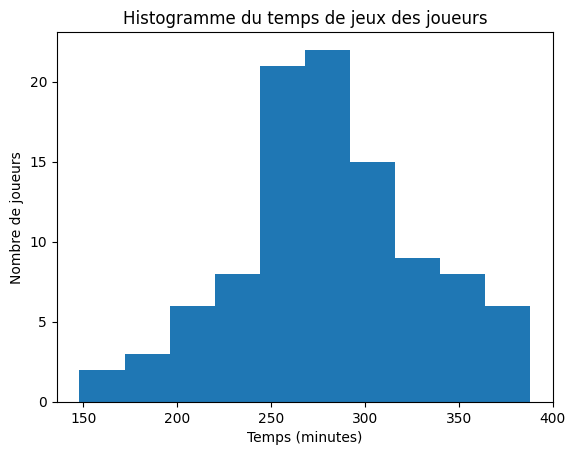

In [193]:
import matplotlib.pyplot as plt

plt.hist(file, bins=range(int(min), int(max) +24, 24))
plt.title("Histogramme du temps de jeux des joueurs")
plt.xlabel("Temps (minutes)")
plt.ylabel("Nombre de joueurs")
plt.show()

iii) En utilisant les tables de la distributions normale, un intervale de confiance sur la moyenne a été calculée avec un niveau de confiance de 95 %

In [194]:
interval_borne_min = moyenne-1.96*std/np.sqrt(100)
interval_borne_max = moyenne+1.96*std/np.sqrt(100)
print(f'{interval_borne_min} <= u <= {interval_borne_max}')

270.7556017152397 <= u <= 290.40439828476025


iv) Le patron du jeux vidéo estime que le temps moyen de jeu des joueurs est d'au moins 5h (300 minutes). Afin de valider ou non cette hyptohese, un test d'hypothèse sera effectuer.On a donc:
  \begin{center}$μ_0 = 300$\end{center}
  \begin{center}$H_0 =\mu\ge\mu_0$\end{center}
  \begin{center}$H_1 = \mu < \mu_0$\end{center}
Nous utiliserons la statistique de test $Z_0 = \frac{\bar{X} - \mu_0}{ s / \sqrt n)}$ puisque la variance est connue (point i)
Afin de rejeter ou non l'hypothèse $H_0$, il suffit alors d'utiliser le Critère de rejet de $H_0$: $Z_0 < -Z_\alpha$ ou $Z_\alpha = 1.96$ avec un niveau de confiance de 95%

In [195]:
U0 = 300
#calcul de Z0
Z0 = (moyenne - U0)/((std/np.sqrt(nbEchantillons)))
Za = 1.96
if Z0 < Za * -1:
    print("L'hypotèse est rejetée")
else:
    print("L'hypothèse est retenue")

L'hypotèse est rejetée


L'erreur de première espece est la probabilité de rejeter à tort l'hypothèse émise :
$P(rejeter\; H_0 | H_0\;est\;vraie)$
$P(\bar{X} < 300 | \mu = 300)$
On trouve donc que l'erreur de première espèce est de 1-95% = 5%


v) L'erreur de deuxième espèce est $P(Non\; rejet\; H_0 |H_0\; fausse)$ : $P(\bar{X} >300 | \mu_0 = \bar{x}) $
$P(Z >  \frac{300-280.12}{s/\sqrt(n)})$ --> P(Z>3.87) = 1 - 0.999946 =

vi)
1. $\sigma$
2. $H_0 = \sigma^2 = 50^2$
3. $H_1 = \sigma^2 \neq 50^2$
4. $X^2_0 = \frac{(n-1)s^2}{\sigma^2_0)$
5. $X^2_0 > X^2_{\alpha/2:n-1}$ ou $X^2_0 < X^2_{1-\alpha:n-1}$
6. 

In [196]:
Chi0= ((nbEchantillons-1)*std**2)/50**2
chi1 = 128.418
chi2 = 73.363
if Chi0 > chi1 or Chi0 < chi2:
    print("Rejet H0")
else:
    print("Non rejet de H0")

Non rejet de H0


vii)
On souhaite s'assurer que les données du fichier suivent une distribution normale. Pour ce faire un test d'ajustement doit être effecuter.
1. $H_0$ : Suit un distribution normale
2. $H_1$ : ne suit un distribution normale
3. $X^2_0 = \sum{ \frac{(O_i - E_i)^2}{E_i}}$
4. $X^2_0 > X^2_{\alpha:k-p-1}$

In [197]:
import scipy
SommeChie = 0
for ligne in bigasstab:
    borneDroit = (ligne[2] - moyenne)/std    
    borneGauche =(ligne[1] - moyenne)/std
    O= ligne[4]
    Pi =  scipy.stats.norm.cdf(borneDroit) - scipy.stats.norm.cdf(borneGauche)
    Ei = 100 * Pi
    SommeChie +=(O-Ei)**2/Ei
print(SommeChie)
khi1 = 14.07
if SommeChie > khi1:
    print("on Rejette: ne suit pas une distribution normale")
else:
    print("on ne rejette pas : Suit bient une distribution normale")

7.325358174763942
on ne rejette pas : Suit bient une distribution normale


## Mandat no 3 : Monte Carlo
### Raélisation de 10 000
Afin de déterminer les temps de branchement des joueurs, nous utiliserons la méthode de simulation monte carlo, à l'aide de la méthode de de la fonction de distribution cumulative inverse. Étant donné que le temps entre chaque arrivé de joueur peut être modelisé par une variable exponentielle, on peut utiliser la fonction de densité de la distribution exponentielle.:
\begin{center} $f(x) = \lambda e^{-\lambda x}$ \end{center}
Il suffit alors d'integrer cette fonction afin d'obtenir la CDF:
\begin{center} $F(x) = 1- e^{-\lambda x}$ \end{center}
Nous pouvons alors inverser la CDF afin de pouvoir obtenir des valeur de x en fonction de F(X)
\begin{center} $x = \frac{-log(1-F(X))}{\lambda}$ \end{center}
On trouve alors 10000 valeurs de x en faisant varié F(X) en utilisant des nombres aléatoires

C:\Users\rriou\AppData\Local\Temp\ipykernel_20068\702664443.py:12: RuntimeWarning: invalid value encountered in log
  q[i] =np.sqrt(- np.log(-(aleatoire2[i] * 2  -1 )**2 +1 ) / (np.sqrt(np.pi/8)))
C:\Users\rriou\AppData\Local\Temp\ipykernel_20068\702664443.py:14: RuntimeWarning: invalid value encountered in log
  q[i] = -np.sqrt(- np.log(-(aleatoire2[i] * 2  -1 )**2 +1 ) / (np.sqrt(np.pi/8)))


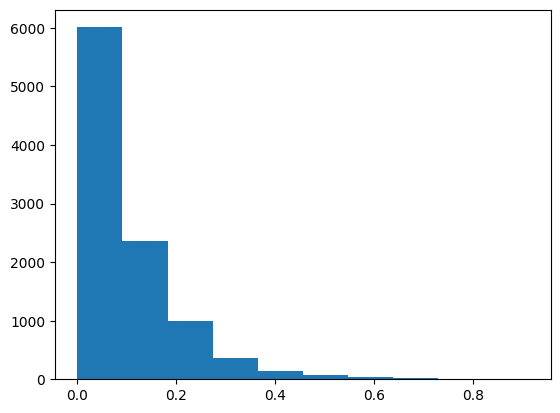

D:\S5\APP5\App2\venv\lib\site-packages\matplotlib\axes\_axes.py:6831: RuntimeWarning: All-NaN slice encountered
  xmin = min(xmin, np.nanmin(xi))
D:\S5\APP5\App2\venv\lib\site-packages\matplotlib\axes\_axes.py:6832: RuntimeWarning: All-NaN slice encountered
  xmax = max(xmax, np.nanmax(xi))


ValueError: autodetected range of [nan, nan] is not finite

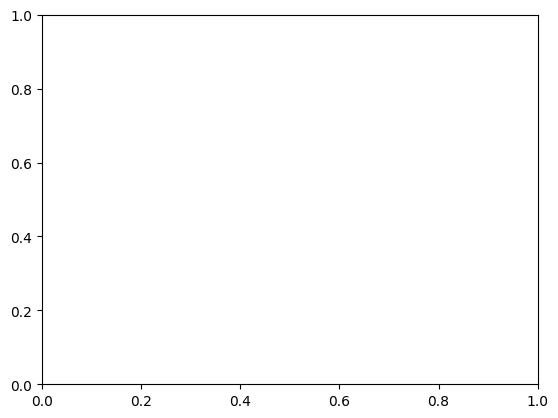

In [198]:
N = 10000
p = np.zeros(N)
aleatoire = np.random.rand(N)
lam = 10
for i in range(N):
    p[i] = (-np.log(1-aleatoire[i]))/lam

q = np.zeros(N)
aleatoire2 = np.random.rand(N) * std + moyenne 
for i in range(len(aleatoire)):
     if aleatoire[i] >= 0.5:
         q[i] =np.sqrt(- np.log(-(aleatoire2[i] * 2  -1 )**2 +1 ) / (np.sqrt(np.pi/8)))
     else:
         q[i] = -np.sqrt(- np.log(-(aleatoire2[i] * 2  -1 )**2 +1 ) / (np.sqrt(np.pi/8)))

plt.hist(p)
plt.show()
plt.hist(q)
plt.show()
